# Heart Attack Data Exploration

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


C:\Users\Oormi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading and Preprocessing Heart Attack Data

In [2]:
# Loading data
file_path = Path("../Resources/heart_attack_prediction_dataset.csv")
df_heart = pd.read_csv(file_path)
df_heart.head()


Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [3]:
df_heart.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [5]:
# Define target vector
y = df_heart["Heart Attack Risk"]
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: Heart Attack Risk, dtype: int64

In [98]:
# Define features set
X = df_heart.copy()
# Drop interfering and target columns
X.drop(["Patient ID","Blood Pressure","Blood Pressure","Country","Continent","Hemisphere",
        "Smoking", "Diabetes", "Obesity", "Alcohol Consumption", "Previous Heart Problems", "Medication Use",
        "Family History", "Diet", "Sleep Hours Per Day", "Physical Activity Days Per Week", "Heart Attack Risk"], axis=1, inplace=True)
X.head()

Age     Sex  Cholesterol  Heart Rate  Exercise Hours Per Week  \
0   67    Male          208          72                 4.168189   
1   21    Male          389          98                 1.813242   
2   21  Female          324          72                 2.078353   
3   84    Male          383          73                 9.828130   
4   66    Male          318          93                 5.804299   

   Stress Level  Sedentary Hours Per Day  Income        BMI  Triglycerides  
0             9                 6.615001  261404  31.251233            286  
1             1                 4.963459  285768  27.194973            235  
2             9                 9.463426  235282  28.176571            587  
3             9                 7.648981  125640  36.464704            378  
4             6                 1.514821  160555  21.809144            231

In [99]:
# Sex Convert categorical column to binary (dummy) variables
df_dummies = pd.get_dummies(X['Sex'], prefix='Sex')
X.drop(["Sex"], axis=1, inplace=True)
# Concatenate the dummy variables with the original DataFrame
X = pd.concat([X, df_dummies], axis=1)

# Diet Convert categorical column to binary (dummy) variables
#X['Diet'] = X['Diet'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})
# Concatenate the dummy variables with the original DataFrame
X.head()

Age  Cholesterol  Heart Rate  Exercise Hours Per Week  Stress Level  \
0   67          208          72                 4.168189             9   
1   21          389          98                 1.813242             1   
2   21          324          72                 2.078353             9   
3   84          383          73                 9.828130             9   
4   66          318          93                 5.804299             6   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  Sex_Female  \
0                 6.615001  261404  31.251233            286           0   
1                 4.963459  285768  27.194973            235           0   
2                 9.463426  235282  28.176571            587           1   
3                 7.648981  125640  36.464704            378           0   
4                 1.514821  160555  21.809144            231           0   

   Sex_Male  
0         1  
1         1  
2         0  
3         1  
4         1

In [53]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3000)

In [54]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [55]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [56]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [57]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=75)

In [58]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [59]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [60]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [61]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Confusion matrix Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0         1377           42
Actual 1          755           17

Confusion matrix Accuracy Score : 0.6362391602008215
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.97      0.78      1419
           1       0.29      0.02      0.04       772

    accuracy                           0.64      2191
   macro avg       0.47      0.50      0.41      2191
weighted avg       0.52      0.64      0.52      2191



## Feature Importance

In [62]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.12116417040932426, 'BMI'),
 (0.12098110118157161, 'Sedentary Hours Per Day'),
 (0.12091820279822639, 'Exercise Hours Per Week'),
 (0.12072594820858777, 'Income'),
 (0.11762097967944017, 'Triglycerides'),
 (0.1125417839772562, 'Cholesterol'),
 (0.10190427974985453, 'Age'),
 (0.1003301784222226, 'Heart Rate'),
 (0.060437672182058186, 'Stress Level'),
 (0.011710498607539862, 'Sex_Female'),
 (0.01166518478391856, 'Sex_Male')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

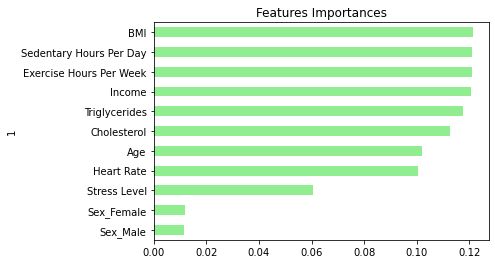

In [63]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Deep learning model

In [100]:
# Import dependencies and determine the number of unique values in each column
import tensorflow as tf
X.nunique()

Age                          73
Cholesterol                 281
Heart Rate                   71
Exercise Hours Per Week    8763
Stress Level                 10
Sedentary Hours Per Day    8763
Income                     8615
BMI                        8763
Triglycerides               771
Sex_Female                    2
Sex_Male                      2
dtype: int64

In [101]:
X.dtypes

Age                          int64
Cholesterol                  int64
Heart Rate                   int64
Exercise Hours Per Week    float64
Stress Level                 int64
Sedentary Hours Per Day    float64
Income                       int64
BMI                        float64
Triglycerides                int64
Sex_Female                   uint8
Sex_Male                     uint8
dtype: object

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3000)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

In [77]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=11))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                192       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [79]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


206/206 [==============================] - 1s 2ms/step - loss: 0.6672 - accuracy: 0.6342
Epoch 2/100
206/206 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.6398
Epoch 3/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6398
Epoch 4/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6522 - accuracy: 0.6398
Epoch 5/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6508 - accuracy: 0.6398
Epoch 6/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.6398
Epoch 7/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.6398
Epoch 8/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.6400
Epoch 9/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.6398
Epoch 10/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6468 - accu

Epoch 77/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.6535
Epoch 78/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6230 - accuracy: 0.6517
Epoch 79/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.6519
Epoch 80/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.6531
Epoch 81/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.6512
Epoch 82/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.6520
Epoch 83/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6220 - accuracy: 0.6572
Epoch 84/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6546
Epoch 85/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.6534
Epoch 86/100
206/206 [==============================] - 0s 1ms/step - loss: 0.6218

In [80]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

69/69 - 0s - loss: 0.6821 - accuracy: 0.6089 - 225ms/epoch - 3ms/step
Loss: 0.6820921301841736, Accuracy: 0.6088544130325317
